
# Исследование определяющих успешность компьютерной игры закономерностей 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования** :

Выяснить, какие платформы будут лидировать на рынке в 2017 году. 

Существует ли корелляция между продажами внутри одной платформы и оценками критиков/пользователей. 

Как распределяется поппулярность между жанрами, и какой из них самый прибыльный.

Проанализировать рынок внутри каждой страны и понять, какие платформы и жанры пользуются там популярностью.

Узнать правда ли, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а также действительно ли средние пользовательские рейтинги жанров Action и Sports разные.

**Ход исследования:**

Исследование пройдёт в три этапа:

Обзор данных.

Предобработка данных.

Исследовательский анализ.

Вывод.


### Откроем файл с данными и изучим общую информацию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

import plotly as pt
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
display(data.head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


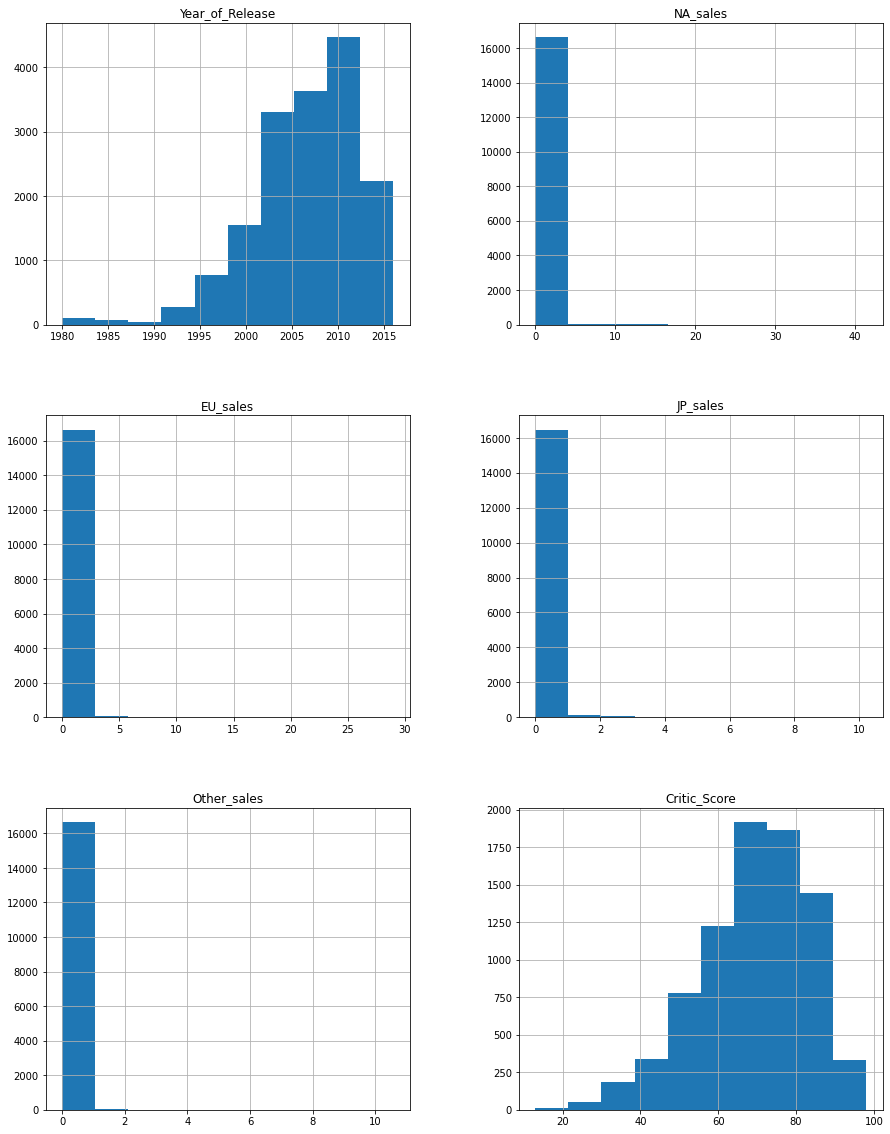

In [4]:
data.hist(figsize=(15, 20));

Отлично! Первый взгляд на данные есть

### Предобработка данных

#### Заменим названия столбцов (приведем к нижнему регистру)

In [5]:
data.columns = [x.lower() for x in data.columns]

In [6]:
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


#### Обработка пропусков

In [7]:
#найдем столбцы с пропусками 
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Оценим в процентах количество пропусков, что понять можно ли их удалить

In [8]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Пропуск имени игры является критическим, поскольку эта информация очень важна. Точно так же, как и жанр. Учитывая важность и очень маленькое количество таких пропусков, удалим строки, для которых не указаны имя и жанр игры

In [9]:
data = data.dropna(subset=['name', 'genre'])

Оценки критиков могут быть пропущены, если критики просто не добрались до этой игры, поэтому пропуски или хотя бы часть из них не случайны. Оценок пользователей могло оказаться слишком мало для формирования итоговой оценки, тем более, что пользователи не очень охотно оценивают игры, они теряют времени ни на что другое, кроме игр.

Чтобы заполнить пропускив рейтингах пользователей, используем данные о продажах
Если продажи больше 75процентного порога по всем данным о проадажах, то это можно считать успехом и тд... Исходя из этой логики, разделим игры на категории по суммарному показателю продаж в странах.

In [10]:
#создадим новый столбец с суммарным значением продаж
data['sum_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [11]:
print(data['sum_sales'].sort_values())


16676     0.00
16709     0.00
16181     0.01
16180     0.01
16179     0.01
         ...  
4        31.38
3        32.77
2        35.52
1        40.24
0        82.54
Name: sum_sales, Length: 16713, dtype: float64


In [12]:
#создадим функцию, которая будет заполнять новый столбец с категориями по проадажам
def categorize_sales(row):
    sales = row['sum_sales']
    if sales <= 10:
        return('E')
    if 10.0001<=sales<=20:
        return('D')
    if 20.0001<=sales<=30:
        return('C')    
    if 30.0001<=sales<=40:
        return('B')
    if 40.0001<=sales:
        return('A')

In [13]:
data['sales_category'] = data.apply(categorize_sales, axis=1)
display(data.head(10)) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,sales_category
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,A
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,A
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,B
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77,B
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,B
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26,B
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,C
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,C
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32,C
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31,C


In [14]:
data['sum_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: sum_sales, Length: 16713, dtype: float64

tbd ('to be determined') в столбце с оценкой пользователей ознчает, что оценок было меньше 4, а значит, общая оценка не может быть сформирована. Заменим эти зачения на NaN

In [15]:
data.loc[data.loc[:,'user_score'] == 'tbd','user_score'] = np.nan

In [16]:
data['user_score'] = data['user_score'].astype('float')

In [17]:
# теперь заполним пропуски в пользовательском рейтинге средними значениями по категории продаж
for letter in data['sales_category'].unique():
    data.loc[data['sales_category'] == letter, 'user_score'] = data.loc[data['sales_category'] == letter, 'user_score'].fillna(
        data.loc[data['sales_category'] == letter, 'user_score'].median())


Разберемся с оценками критиков. Предположим, что оценки критиков очень часто совпадают или хотя бы близки по значению к оценке пользователя. Все-таки хорошие, качественные игры и пользуются популярностью у игроков.

In [18]:
#оценки критиков не содержат дробных значений
#критики оценивают по 100 бальной шкале
for num in data['user_score'].unique():
    data.loc[data['user_score'] == num, 'critic_score'] = data.loc[data['user_score'] == num, 'critic_score'].fillna(
        round(data.loc[data['user_score'] == num, 'user_score']*10))

Тк пропуски в столбце с годом выпуска занимают всего лишь два процента, а также восстановить их без вреда для данных будет очень сложно, мы можем уадлить строчки с пропуском

In [19]:
data = data.dropna(subset=['year_of_release'])

А теперь разберемся с рейтингом от ESRB (Entertainment Software Rating Board)
Скорее всего спортивные игры доступны для всех возрастов, а вот в "стрелялках" скорее всего стоит возрастное ограничение. Посмотрим, как рейтинг распределен между жанрами

In [20]:
print(data['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [21]:
data['rating'] = data['rating'].fillna('unknown')

In [26]:
print(data.isna().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
sum_sales          0
sales_category     0
dtype: int64


Отлично, пропуски заполнены

#### Типы данных

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  sum_sales        16444 non-null  float64
 12  sales_category   16444 non-null  object 
dtypes: float64(8), object(5)
memory usage: 1.8+ MB


In [28]:
data_int=['year_of_release', 'critic_score']
for elem in data_int:
    data[elem] = data[elem].astype('int')


Изменим тип данных в стоблцах с годом выпуска и оценкой критиков, тк эти значения целые

#### Обработка дубликатов

In [29]:
data.duplicated(['name','genre','platform','year_of_release']).sum()

1

In [30]:
data[['name','genre','platform','year_of_release']] = data[['name','genre','platform','year_of_release']].drop_duplicates()
data.duplicated(['name','genre','platform','year_of_release']).sum()

0

Отлично, явных дубликатов нет, перейдем к поиску неявных.

In [31]:
print(data['name'].value_counts())

Need for Speed: Most Wanted               12
LEGO Marvel Super Heroes                   9
Ratatouille                                9
FIFA 14                                    9
Terraria                                   8
                                          ..
Hannah Montana: Rock Out the Show          1
Hissatsu Pachinko Collection 3             1
Jojo's Fashion Show: Design in a Dash!     1
Festa!! Hyper Girls Party                  1
Dream Dance & Cheer                        1
Name: name, Length: 11426, dtype: int64


In [32]:
data['name'].str.lower().value_counts()

need for speed: most wanted                  12
fifa 14                                       9
lego marvel super heroes                      9
ratatouille                                   9
lego the hobbit                               8
                                             ..
east india company collection                 1
doom 3: resurrection of evil                  1
ogre battle series: tactics ogre              1
jitsumei jikkyou keiba dream classic 2002     1
etrian odyssey iv: legends of the titans      1
Name: name, Length: 11426, dtype: int64

In [33]:
print(data['genre'].unique()) #тут все хорошо

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


я закомментировала обработку дубликатов, потому что добавила ее уже под конец проекта и почему-то она ломала мне код. Тк дубликат я нашла всего один, то подумала, что если не уберу его, то данные не сильно пострадают.

### Исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы

,name
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


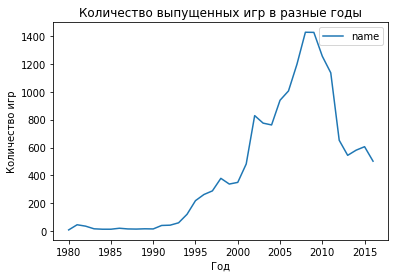

In [34]:
data_years = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
data_years.plot(title='Количество выпущенных игр в разные годы', xlabel='Год', ylabel='Количество игр')
display(data_years)

In [35]:
#data_years = data_years[data_years['name']>150]
#print(data_years)
data = data.query('year_of_release >2004')
print(data['year_of_release'].value_counts())
#оставим в данных только года больше 2004, тк только они являются значимыми

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2012.0     652
2015.0     606
2014.0     581
2013.0     544
2016.0     502
Name: year_of_release, dtype: int64


Игры начали выпускаться после 2004, в эти годы началось активное развитие технологий и интернета. Самыми существеннными данными обладают года с 2004. Пик выпуска игр состоялся в 2008-2009 годах. 

#### Посмотрим, как менялись продажи по платформам. 

In [37]:
data_platforms = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
print(data_platforms.sort_values(by='sum_sales'))

          sum_sales
platform           
DC             0.06
GC            39.15
GBA           42.54
PSV           53.81
XB            59.85
WiiU          82.19
XOne         159.32
PC           167.79
3DS          257.81
PSP          282.47
PS4          314.14
PS2          426.46
DS           785.49
Wii          891.18
PS3          931.33
X360         961.24


In [38]:
list_of_platforms =['XOne', 
'PC',           
'3DS',          
'PSP',          
'PS4',          
'PS2',         
'DS' ,         
'Wii' ,         
'PS3'  ,        
'X360']

In [39]:
data = data.query('platform in @list_of_platforms')

In [40]:
print(data['platform'].unique())

['Wii' 'DS' 'X360' 'PS3' 'PS4' '3DS' 'PC' 'PSP' 'XOne' 'PS2']


<AxesSubplot: xlabel='platform', ylabel='sum_sales'>

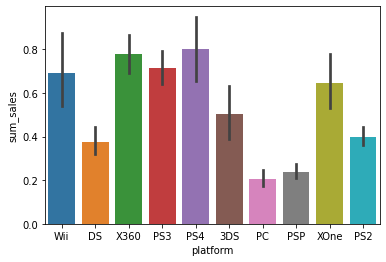

In [41]:
seaborn.barplot(data=data, x='platform', y='sum_sales')

In [42]:

data_plat = data.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')


display(data_plat)

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,Wii,X360,XOne
year_of_release,,,,,,,,,,
2005.0,NaN,130.14,4.37,160.66,NaN,NaN,43.84,NaN,8.25,NaN
2006.0,NaN,119.81,2.85,103.42,20.96,NaN,55.32,137.15,51.62,NaN
2007.0,NaN,146.94,9.28,75.99,73.19,NaN,46.93,152.77,95.41,NaN
2008.0,NaN,145.31,12.42,53.90,118.52,NaN,34.55,171.32,135.26,NaN
2009.0,NaN,119.54,16.91,26.40,130.93,NaN,37.78,206.97,120.29,NaN
2010.0,NaN,85.02,24.28,5.64,142.17,NaN,35.04,127.95,170.03,NaN
2011.0,63.20,26.18,35.03,0.45,156.78,NaN,17.82,59.65,143.84,NaN
2012.0,51.36,11.01,23.22,NaN,107.35,NaN,7.69,21.71,99.74,NaN
2013.0,56.57,1.54,12.38,NaN,113.25,25.99,3.14,8.59,88.58,18.96


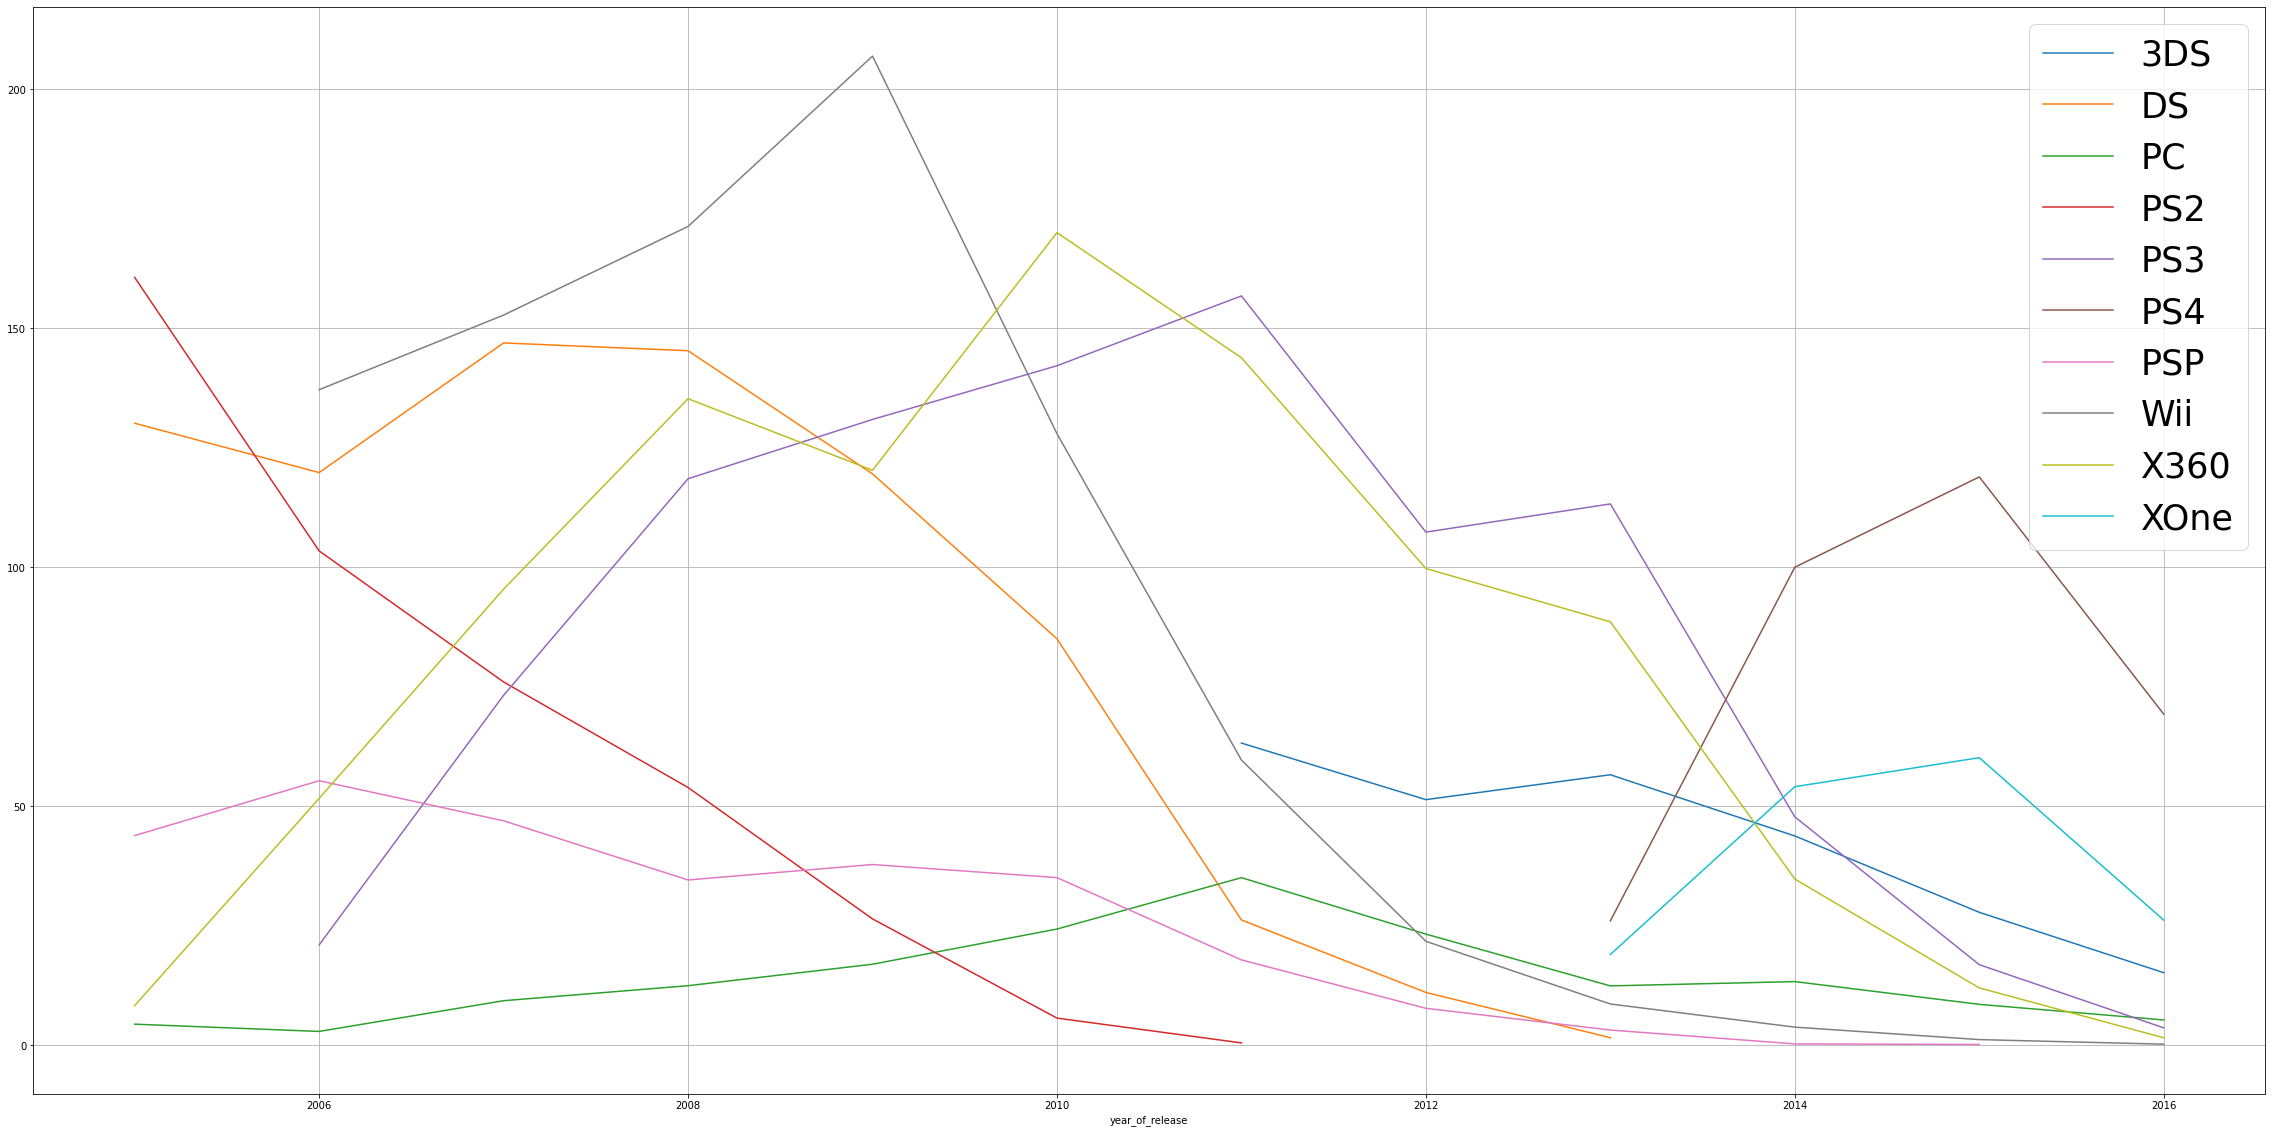

In [43]:
data_plat.plot(grid=True, figsize=(40,20))
plt.legend(fontsize=35)

<AxesSubplot: xlabel='platform', ylabel='year_of_release'>

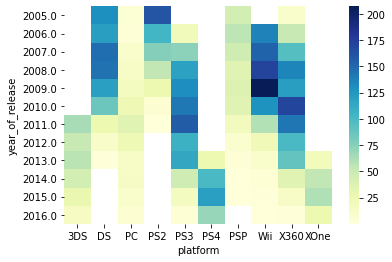

In [44]:
import seaborn
seaborn.heatmap(data_plat, cmap="YlGnBu")


В среднем платформа держит свою популярность примерно 5 лет. Будем считать, что актуальный период -- 5 лет.

In [45]:
#обрежем данные по периоду акутальности
data_actual = data.query('year_of_release >=2013')
display(data_actual.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,sales_category
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,C
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,D
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,78,7.8,unknown,14.63,D
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,78,7.8,unknown,14.60,D
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62,D
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,78,7.8,unknown,11.68,D
60,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24,D
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71,2.6,M,9.36,E
72,Minecraft,X360,2013.0,Misc,5.70,2.65,0.02,0.81,75,7.5,unknown,9.18,E
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58,E


#### Выясним, какие платформы лидируют по продажам, растут или падают

In [46]:
data_actual['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'Wii', 'PC', 'DS', 'PSP'],
      dtype=object)

Мы можем оценить по предыдущему графику предположительно прибыльные платформы. Это:
- PS4
- XOne
- 3DS
- PC

In [47]:
data_PS4 = data_actual[data_actual['platform'] == 'PS4']
data_XOne = data_actual[data_actual['platform'] == 'XOne']
data_3DS = data_actual[data_actual['platform'] == '3DS']
data_PC = data_actual[data_actual['platform'] == 'PC']

Изучим PS4

In [48]:
print(data_PS4['year_of_release'].unique())

[2015. 2014. 2016. 2013.]


<AxesSubplot: xlabel='year_of_release', ylabel='sum_sales'>

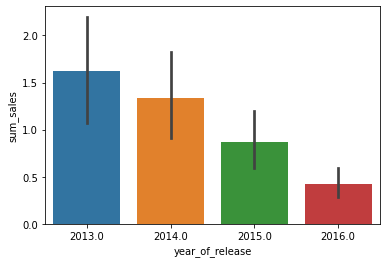

In [49]:
seaborn.barplot(data=data_PS4, x='year_of_release', y ='sum_sales')


Изучим XOne

<AxesSubplot: xlabel='year_of_release', ylabel='sum_sales'>

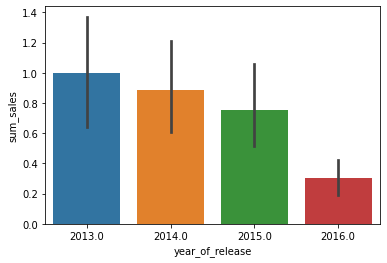

In [50]:
seaborn.barplot(data=data_XOne, x='year_of_release', y ='sum_sales')

Изучим 3DS

<AxesSubplot: xlabel='year_of_release', ylabel='sum_sales'>

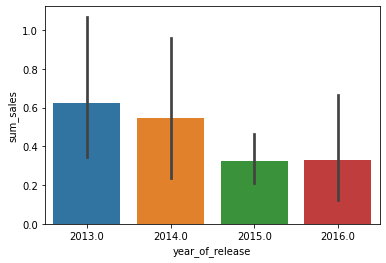

In [51]:
seaborn.barplot(data=data_3DS, x='year_of_release', y ='sum_sales')

Изучим PC

<AxesSubplot: xlabel='year_of_release', ylabel='sum_sales'>

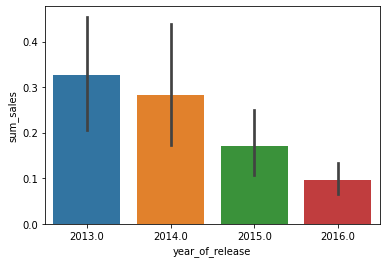

In [52]:
seaborn.barplot(data=data_PC, x='year_of_release', y ='sum_sales')

In [53]:
data_pivot_plat = data_actual.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
print(data_pivot_plat)

platform           3DS    DS     PC     PS3     PS4   PSP   Wii   X360   XOne
year_of_release                                                              
2013.0           56.57  1.54  12.38  113.25   25.99  3.14  8.59  88.58  18.96
2014.0           43.76   NaN  13.28   47.76  100.00  0.24  3.75  34.74  54.07
2015.0           27.78   NaN   8.52   16.82  118.90  0.12  1.14  11.96  60.14
2016.0           15.14   NaN   5.25    3.60   69.25   NaN  0.18   1.52  26.15


<AxesSubplot: title={'center': 'Количество выпущенных игр в разные годы'}, xlabel='Год', ylabel='Количество игр'>

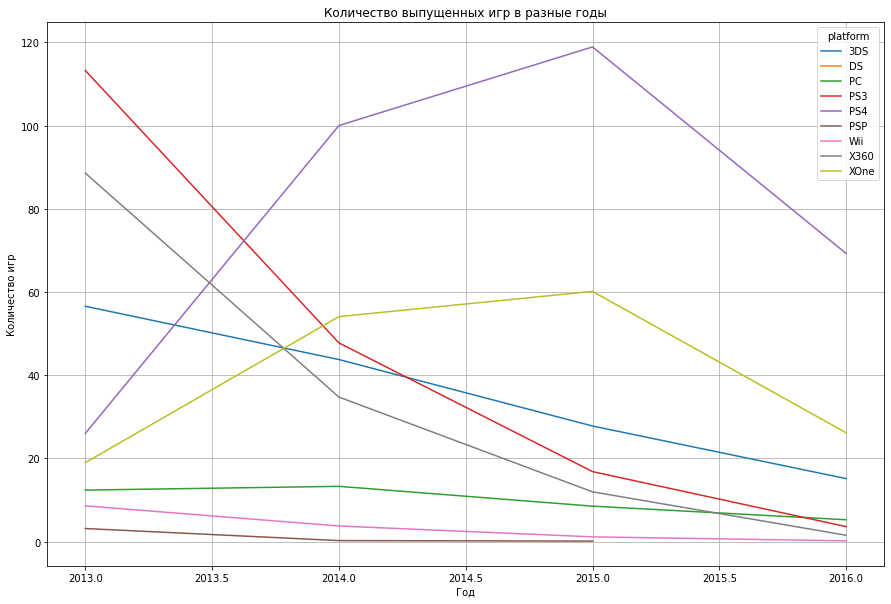

In [54]:
data_pivot_plat.plot(figsize=(15,10), grid=True, title='Количество выпущенных игр в разные годы', xlabel='Год', ylabel = 'Количество игр')

Можно заметить, что у платформ продажи падают. Нет ни одной, у которой наблюдается рост. Это свидетельсвтует о том, что скорее всего в 2017 появятся новые платформы, которые будут возглавлять топы в течение 5 лет

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

<AxesSubplot: xlabel='platform', ylabel='sum_sales'>

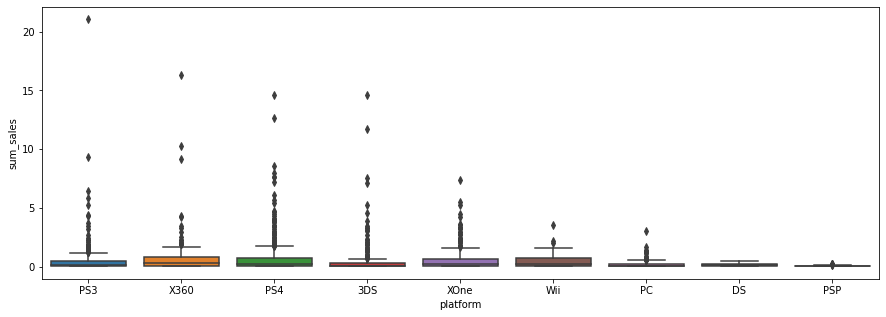

In [55]:
plt.rcParams['figure.figsize']=(15,5)
seaborn.boxplot(data=data_actual, x=data_actual['platform'], y=data_actual['sum_sales'])


#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

In [56]:
data_PS4 = data_actual[data_actual['platform'] == 'PS4']
data_XOne = data_actual[data_actual['platform'] == 'XOne']
data_3DS = data_actual[data_actual['platform'] == '3DS']
data_DS = data_actual[data_actual['platform'] == 'DS']
data_PC = data_actual[data_actual['platform'] == 'PC']
data_PS3 = data_actual[data_actual['platform'] == 'PS3']
data_PSP = data_actual[data_actual['platform'] == 'PSP']
data_Wii = data_actual[data_actual['platform'] == 'Wii']
data_X360 = data_actual[data_actual['platform'] == 'X360']
tables = [data_PS4, data_XOne, data_3DS, data_DS, data_PC, data_PS3, data_PSP, data_Wii, data_X360 ]
#у нас есть отдельные таблицы для каждой платформы

##### PS4

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


0.3144538883411139
-0.057394341756409874


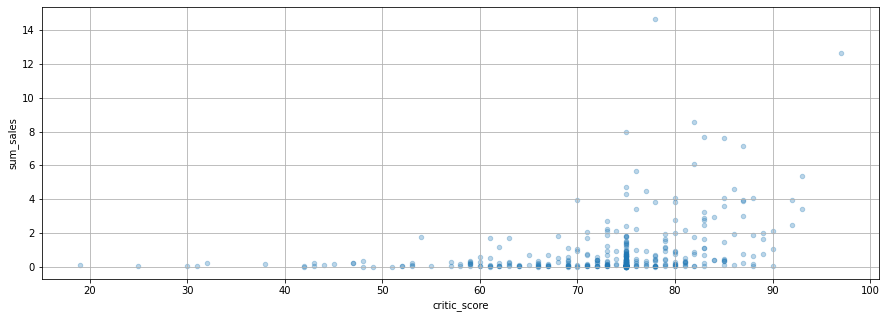

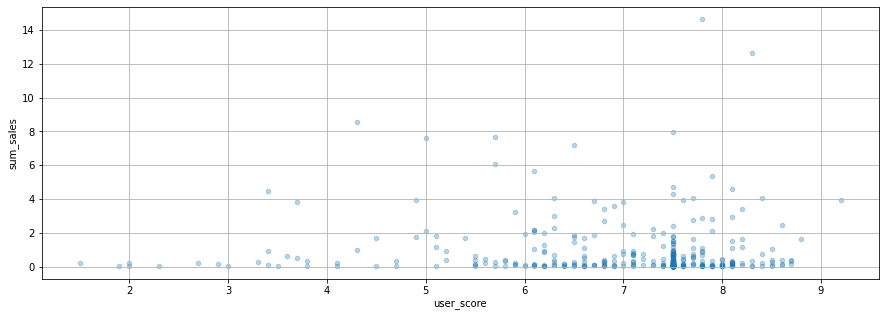

In [57]:
data_PS4.plot(kind='scatter', x='critic_score', y='sum_sales', alpha=0.3, grid=True)
print(data_PS4['critic_score'].corr(data_PS4['sum_sales']))
data_PS4.plot(kind='scatter', x='user_score', y='sum_sales', alpha=0.3, grid=True)
print(data_PS4['user_score'].corr(data_PS4['sum_sales']))
#корелляции почти нет

##### XOne

0.3311635981718571
-0.10593718103209239


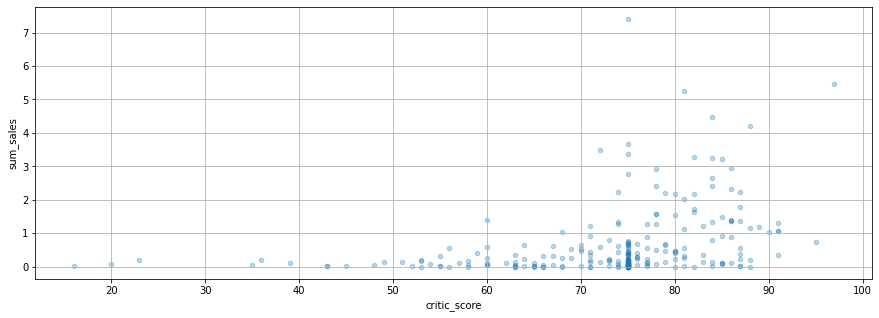

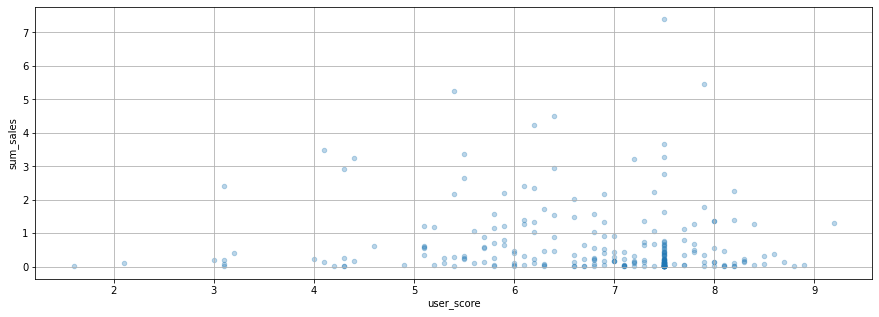

In [58]:
data_XOne.plot(kind='scatter', x='critic_score', y='sum_sales', alpha=0.3, grid=True)
print(data_XOne['critic_score'].corr(data_XOne['sum_sales']))
data_XOne.plot(kind='scatter', x='user_score', y='sum_sales', alpha=0.3, grid=True)
print(data_XOne['user_score'].corr(data_XOne['sum_sales']))
#корелляции почти нет

##### 3DS

0.0989501974209502
0.08724829644876538


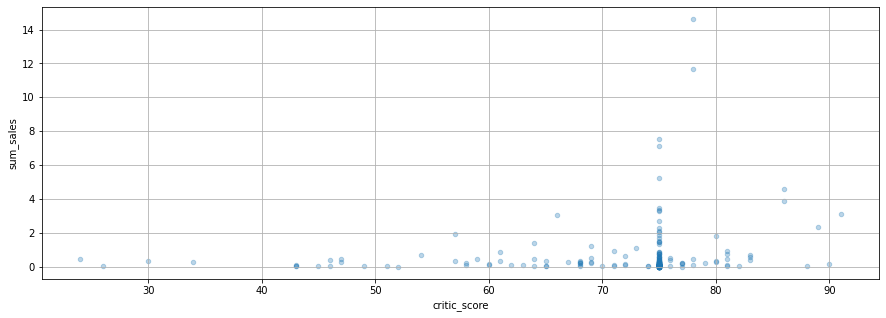

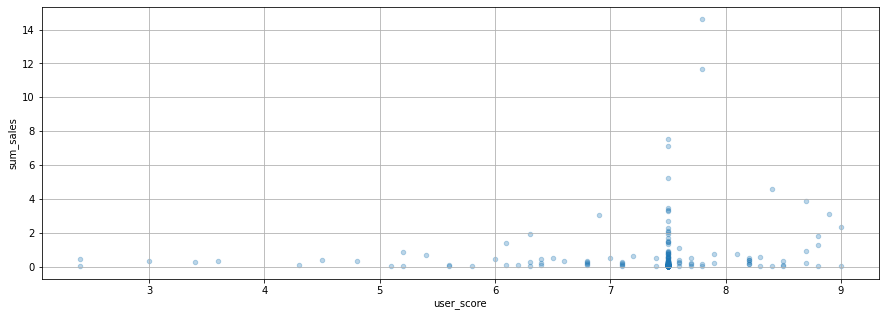

In [59]:
data_3DS.plot(kind='scatter', x='critic_score', y='sum_sales', alpha=0.3, grid=True)
print(data_3DS['critic_score'].corr(data_3DS['sum_sales']))
data_3DS.plot(kind='scatter', x='user_score', y='sum_sales', alpha=0.3, grid=True)
print(data_3DS['user_score'].corr(data_3DS['sum_sales']))

##### DS

-0.44040757146749465
-0.4404075714674946


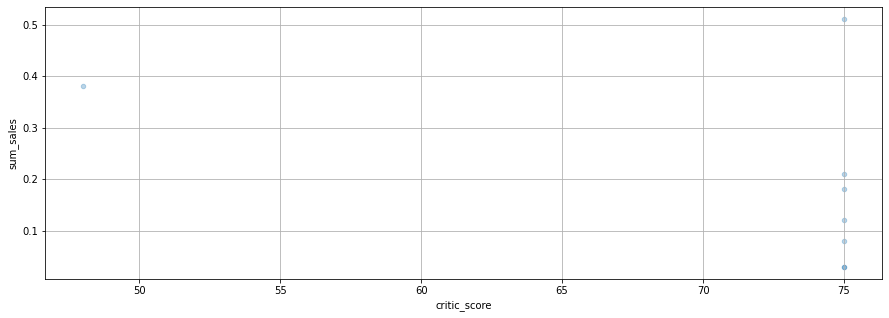

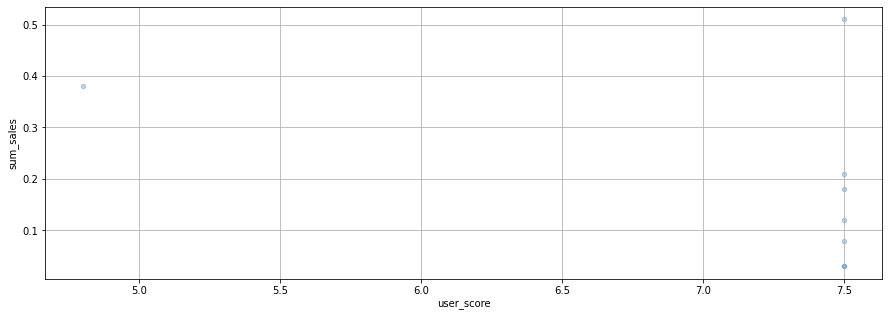

In [60]:
data_DS.plot(kind='scatter', x='critic_score', y='sum_sales', alpha=0.3, grid=True)
print(data_DS['critic_score'].corr(data_DS['sum_sales']))
data_DS.plot(kind='scatter', x='user_score', y='sum_sales', alpha=0.3, grid=True)
print(data_DS['user_score'].corr(data_DS['sum_sales']))

##### PC

0.19360067260888286
-0.11566328693215933


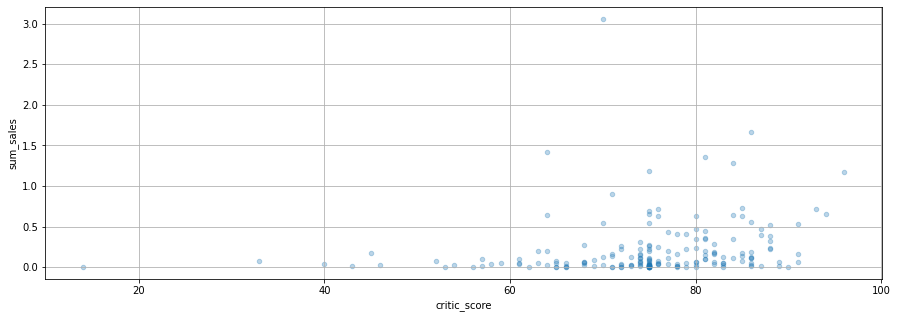

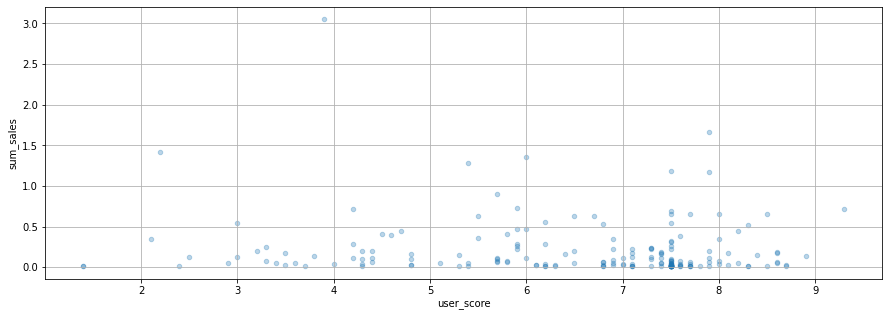

In [61]:
data_PC.plot(kind='scatter', x='critic_score', y='sum_sales', alpha=0.3, grid=True)
print(data_PC['critic_score'].corr(data_PC['sum_sales']))
data_PC.plot(kind='scatter', x='user_score', y='sum_sales', alpha=0.3, grid=True)
print(data_PC['user_score'].corr(data_PC['sum_sales']))

##### PS3

0.11671841660456665
-0.0850580955878706


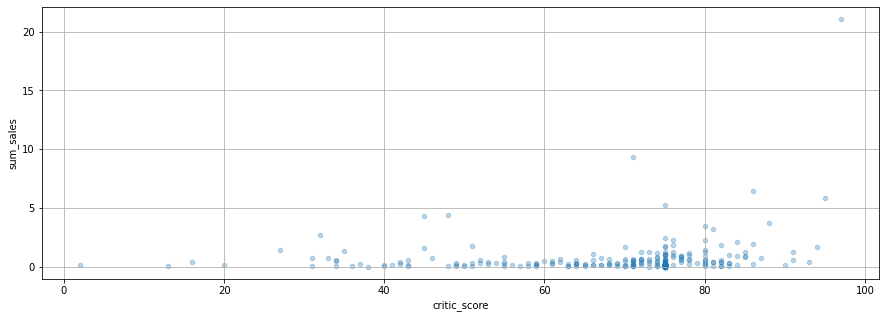

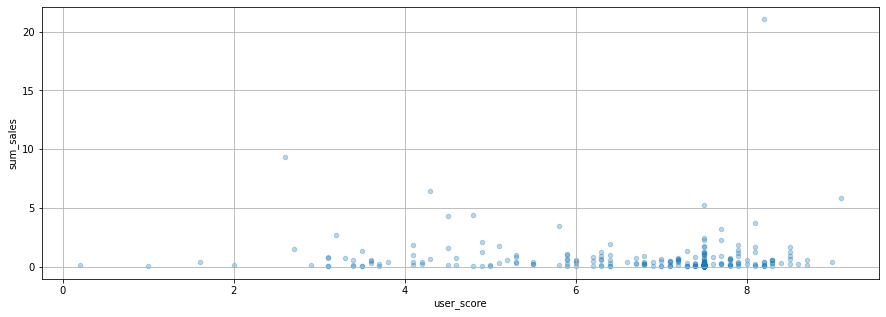

In [62]:
data_PS3.plot(kind='scatter', x='critic_score', y='sum_sales', alpha=0.3, grid=True)
print(data_PS3['critic_score'].corr(data_PS3['sum_sales']))
data_PS3.plot(kind='scatter', x='user_score', y='sum_sales', alpha=0.3, grid=True)
print(data_PS3['user_score'].corr(data_PS3['sum_sales']))

##### PSP

-0.29082875876602693
-0.24103395273485265


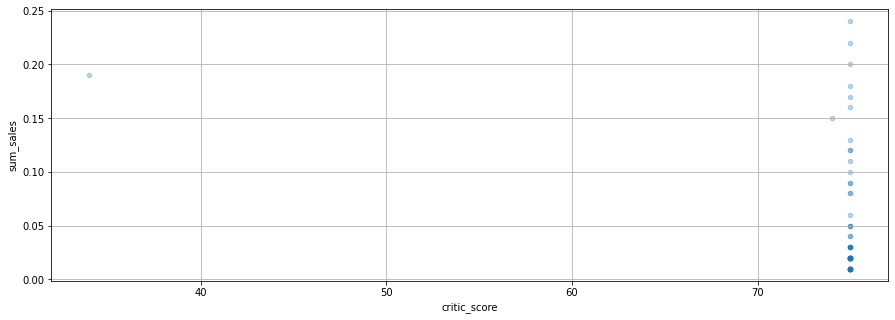

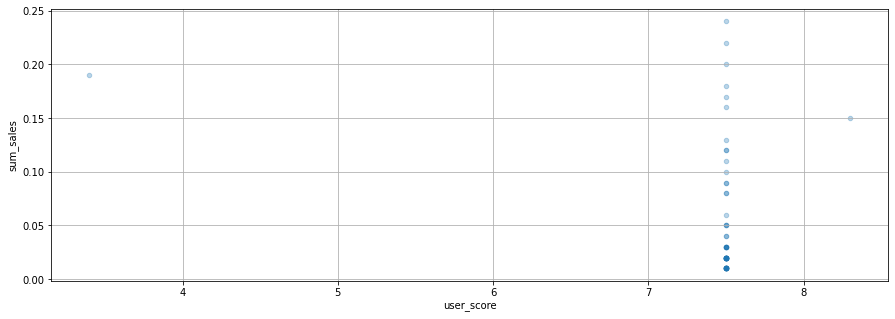

In [63]:
data_PSP.plot(kind='scatter', x='critic_score', y='sum_sales', alpha=0.3, grid=True)
print(data_PSP['critic_score'].corr(data_PSP['sum_sales']))
data_PSP.plot(kind='scatter', x='user_score', y='sum_sales', alpha=0.3, grid=True)
print(data_PSP['user_score'].corr(data_PSP['sum_sales']))

##### Wii

-0.17041274633890402
-0.17041274633890413


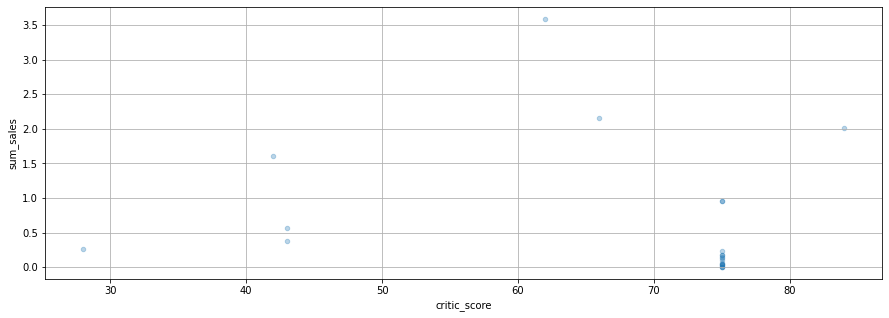

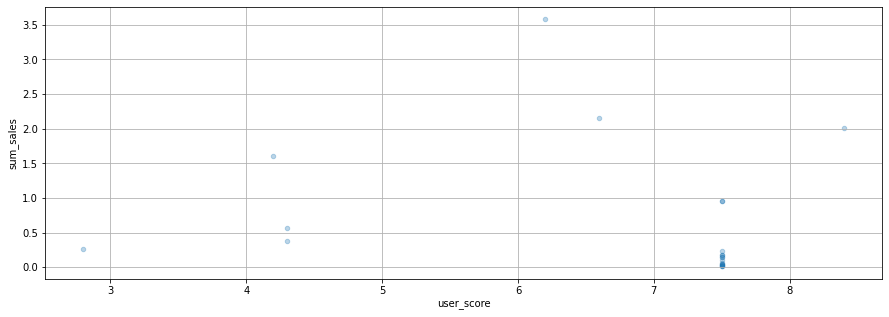

In [64]:
data_Wii.plot(kind='scatter', x='critic_score', y='sum_sales', alpha=0.3, grid=True)
print(data_Wii['critic_score'].corr(data_Wii['sum_sales']))
data_Wii.plot(kind='scatter', x='user_score', y='sum_sales', alpha=0.3, grid=True)
print(data_Wii['user_score'].corr(data_Wii['sum_sales']))

##### X360

0.1834181481664441
-0.04454824441262296


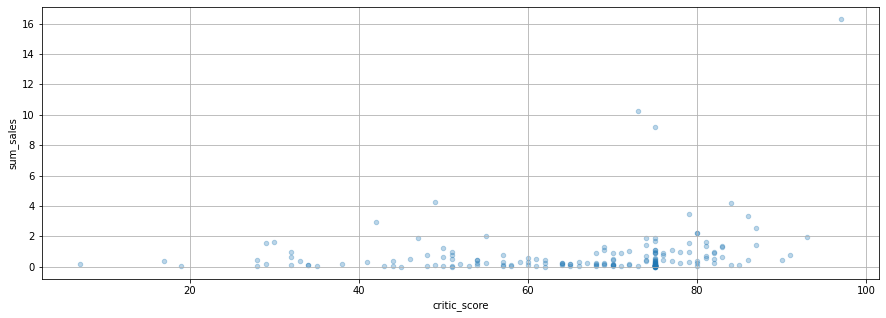

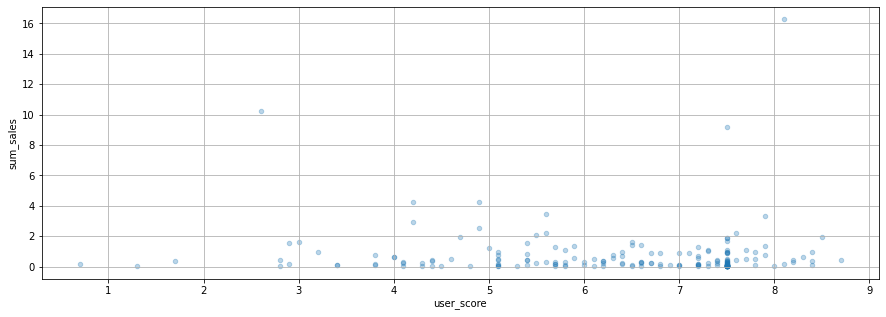

In [65]:
data_X360.plot(kind='scatter', x='critic_score', y='sum_sales', alpha=0.3, grid=True)
print(data_X360['critic_score'].corr(data_X360['sum_sales']))
data_X360.plot(kind='scatter', x='user_score', y='sum_sales', alpha=0.3, grid=True)
print(data_X360['user_score'].corr(data_X360['sum_sales']))

0.3144538883411139 PS4
0.3311635981718571 XOne
0.0989501974209502 3DS
-0.44040757146749465 DS
0.19360067260888286 PC
0.11671841660456665 PS3
-0.29082875876602693 PSP
-0.17041274633890402 Wii
0.1834181481664441 X360


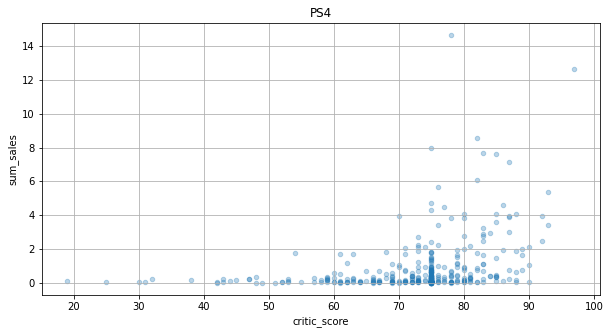

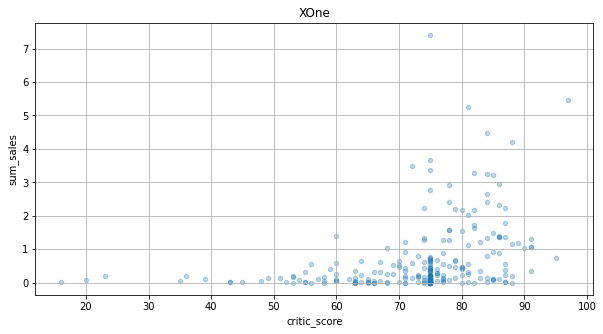

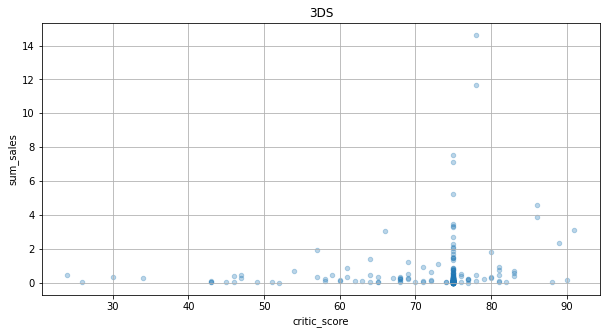

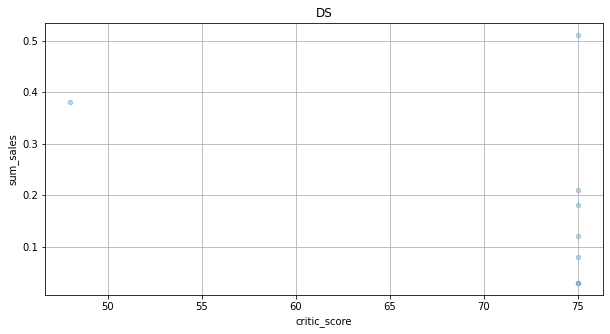

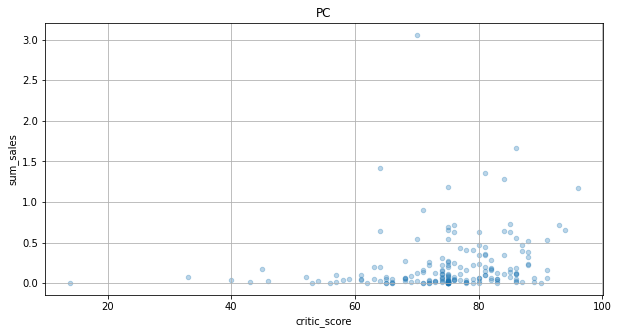

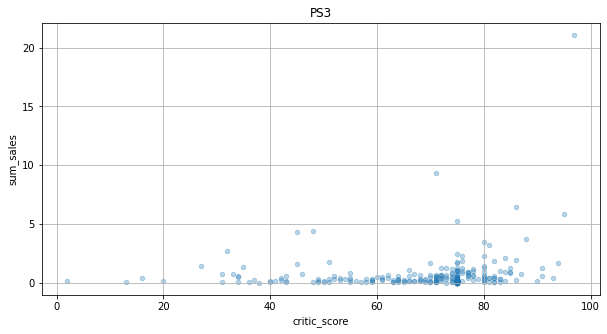

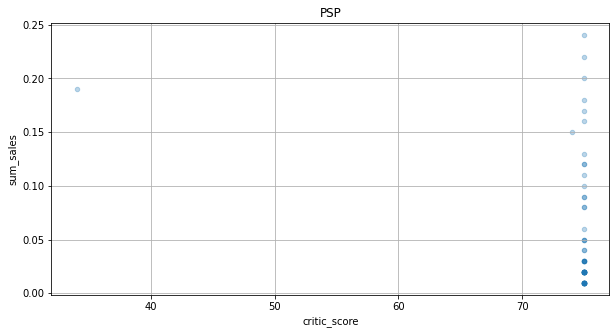

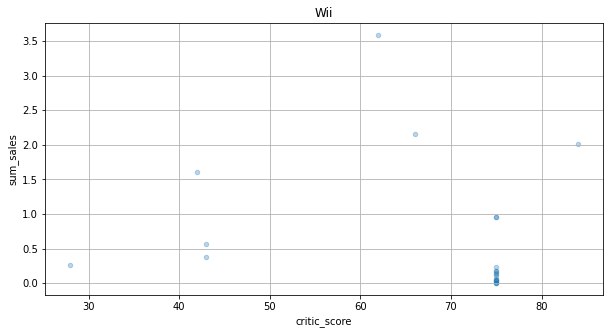

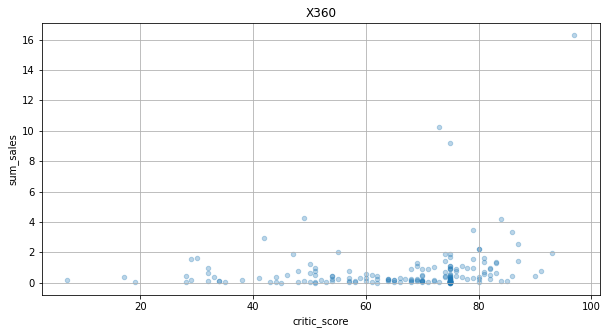

In [68]:

#warnings.filterwarnings('ignore') 

platform_list=['PS4', 'XOne', '3DS', 'DS', 'PC', 'PS3', 'PSP', 'Wii', 'X360']
for platform in platform_list:
    data_actual[data_actual['platform'] == platform].plot(kind='scatter', x='critic_score', y='sum_sales', alpha=0.3,figsize=(10,5), grid=True, title=platform)
    print(data_actual[data_actual['platform'] == platform]['critic_score'].corr(data_actual[data_actual['platform'] == platform]['sum_sales']), platform)

-0.057394341756409874 PS4
-0.10593718103209239 XOne
0.08724829644876538 3DS
-0.4404075714674946 DS
-0.11566328693215933 PC
-0.0850580955878706 PS3
-0.24103395273485265 PSP
-0.17041274633890413 Wii
-0.04454824441262296 X360


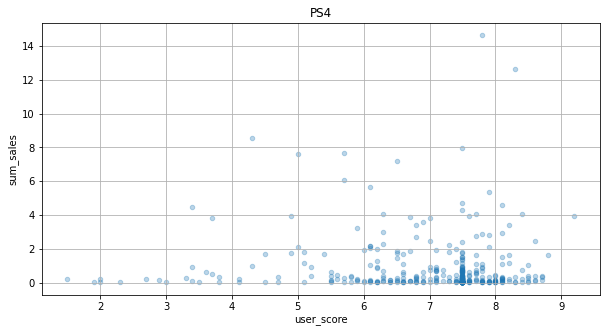

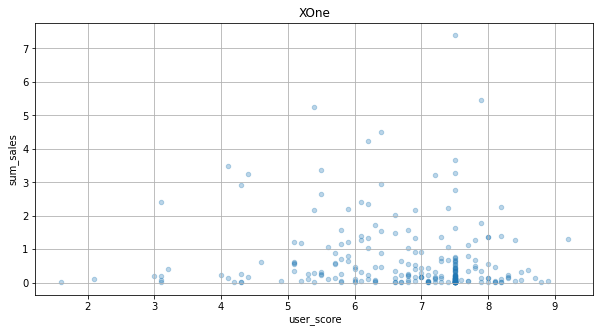

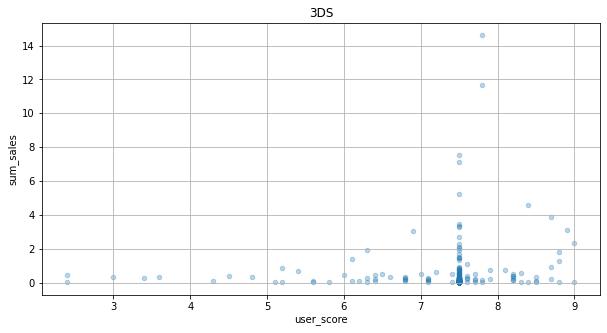

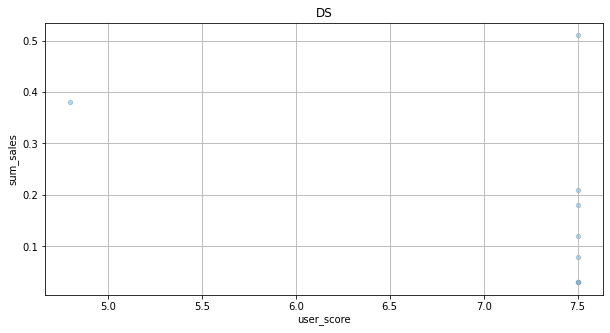

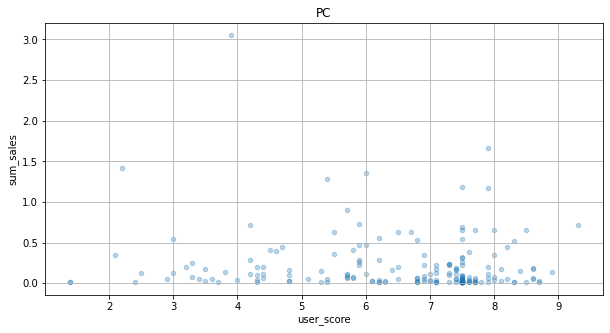

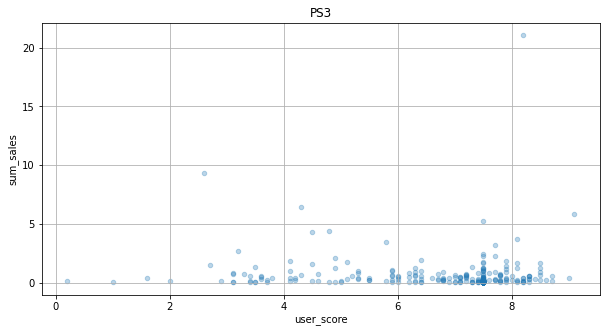

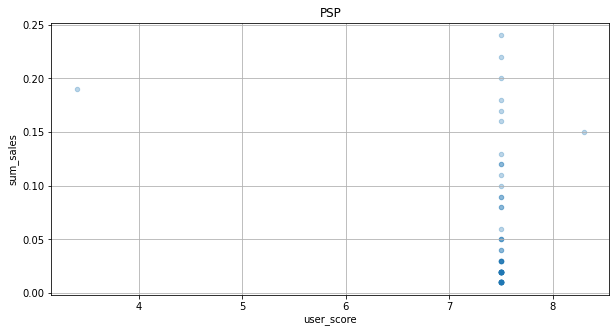

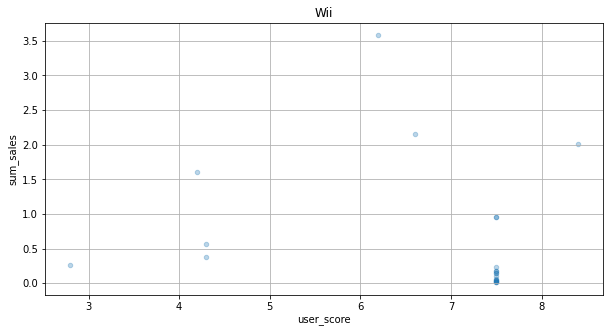

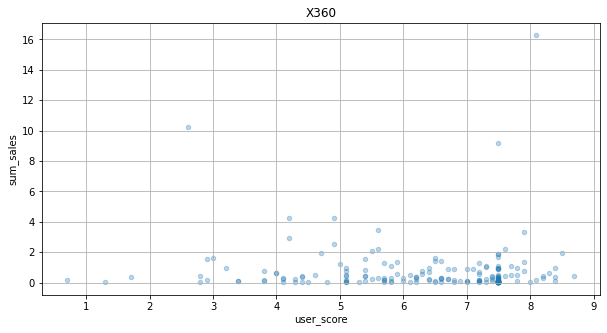

In [70]:
#warnings.filterwarnings('ignore') 

platform_list=['PS4', 'XOne', '3DS', 'DS', 'PC', 'PS3', 'PSP', 'Wii', 'X360']
for platform in platform_list:
    data_actual[data_actual['platform'] == platform].plot(kind='scatter', x='user_score', y='sum_sales', alpha=0.3,figsize=(10,5), grid=True, title=platform)
    print(data_actual[data_actual['platform'] == platform]['user_score'].corr(data_actual[data_actual['platform'] == platform]['sum_sales']), platform)

Можно заметить, что корелляция между оценкой критиков/пользователей и продажами игры не очень сильная. Ярче всего она выражена у платформ PS4, XOne. По граифку видно, что высокие значения общей суммы продаж во  появляются только в области высоких оценок критиков. Также корелляцию можно определить численно при помощи коэффицента Пирсона. Для двух вышеупомянутых платформ он равен 0.3, нельзя сказатть, что это большое значение, однако относительно других платформ с коэффицентом близким к нулю (что говорит об отссутствии корелляции) это достаточно много.

#### Распределение по жанрам

In [71]:
data_actual_genres = data_actual.pivot_table(index='genre', values='name', aggfunc='count')
data_actual_genres = data_actual_genres.reset_index()
print(data_actual_genres.sort_values(by='name', ascending=False))

           genre  name
0         Action   593
7   Role-Playing   209
10        Sports   192
8        Shooter   177
1      Adventure   156
3           Misc   118
6         Racing    80
2       Fighting    66
9     Simulation    58
4       Platform    53
11      Strategy    47
5         Puzzle    11


In [72]:
plt.rcParams['figure.figsize']=(20,10)

<AxesSubplot: xlabel='genre', ylabel='name'>

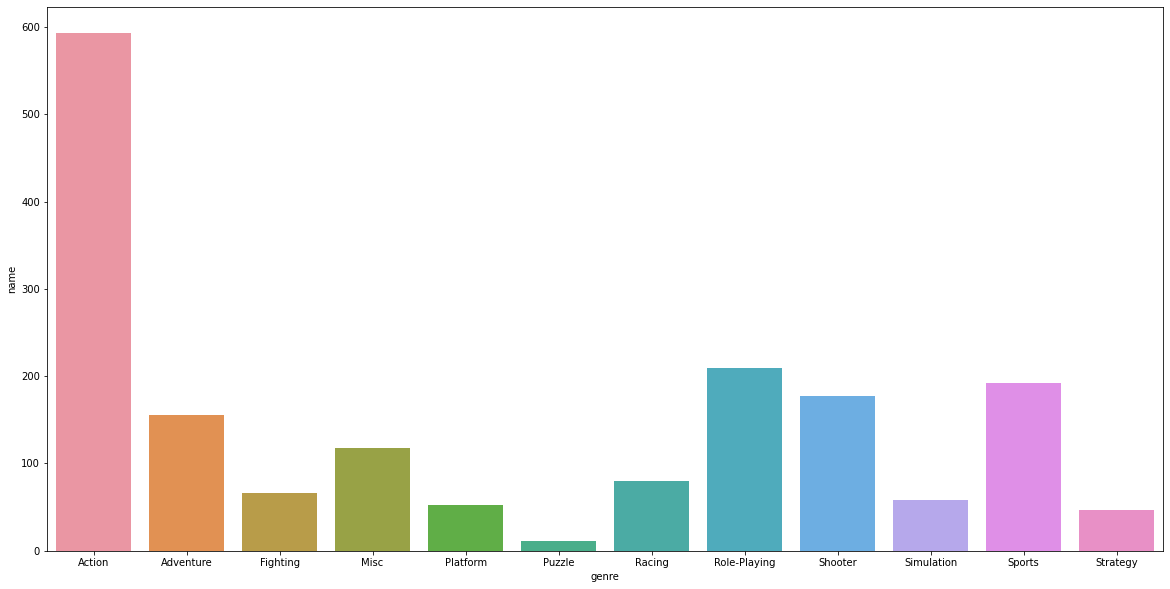

In [73]:
seaborn.barplot(data=data_actual_genres, x='genre',  y ='name')

Среди игр больше всего Action, Role-playing и Sports

In [74]:
plt.rcParams['figure.figsize']=(20,10)

<AxesSubplot: xlabel='genre', ylabel='sum_sales'>

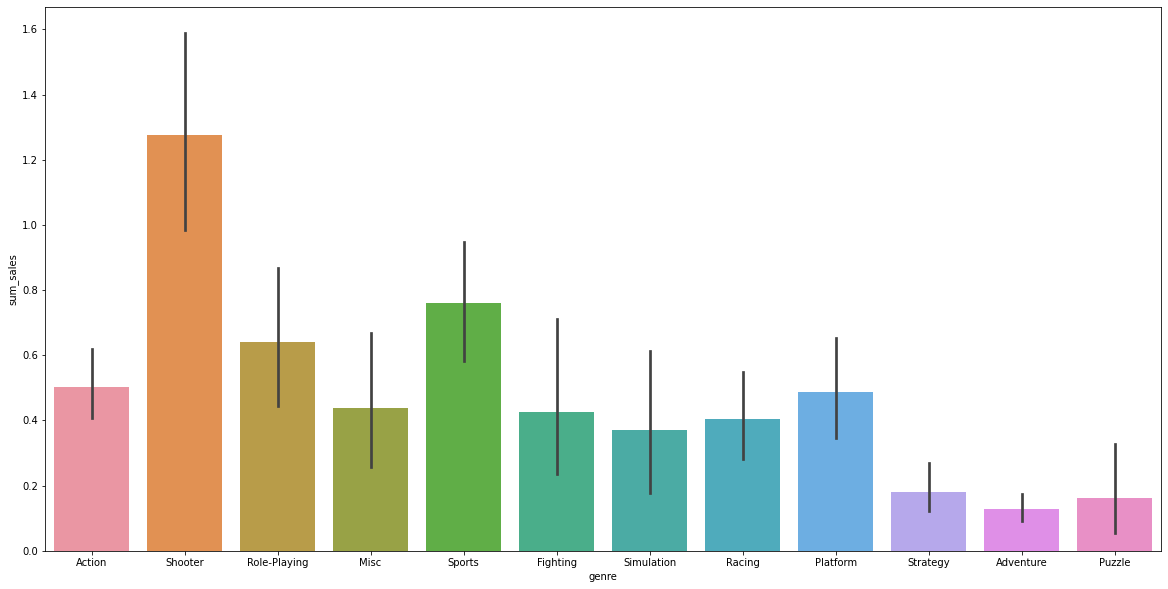

In [76]:
seaborn.barplot(data=data_actual, x='genre', y='sum_sales')

Судя по графику, самыми прибыльными жанрами являются shooter, sports, role-playing. Shooter сильно лидирует, имеет большой отрыв по продажам от других жанров

#### Составим портрет пользователя каждого региона


##### Рассмотрим популярность разных платформ в странах

,platform,na_sales,part
0,3DS,38.20,0.094681
1,DS,0.57,0.001413
2,PC,11.11,0.027537
3,PS3,63.50,0.157389
4,PS4,108.74,0.269519
5,PSP,0.00,0.000000
6,Wii,6.56,0.016259
7,X360,81.66,0.202399
8,XOne,93.12,0.230804


,platform,eu_sales,part
0,3DS,30.96,0.084525
1,DS,0.85,0.002321
2,PC,25.36,0.069237
3,PS3,67.81,0.185132
4,PS4,141.09,0.385197
5,PSP,0.17,0.000464
6,Wii,5.93,0.016190
7,X360,42.52,0.116086
8,XOne,51.59,0.140849


,platform,jp_sales,part
0,3DS,67.81,0.609200
1,DS,0.00,0.000000
2,PC,0.00,0.000000
3,PS3,23.35,0.209775
4,PS4,15.96,0.143383
5,PSP,3.29,0.029557
6,Wii,0.05,0.000449
7,X360,0.51,0.004582
8,XOne,0.34,0.003055


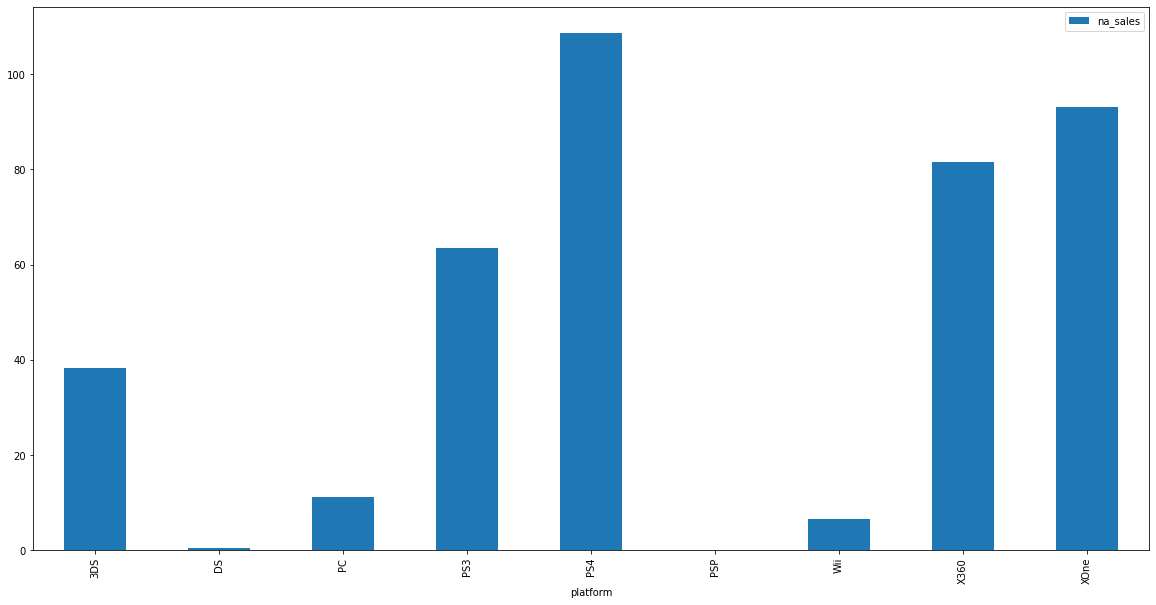

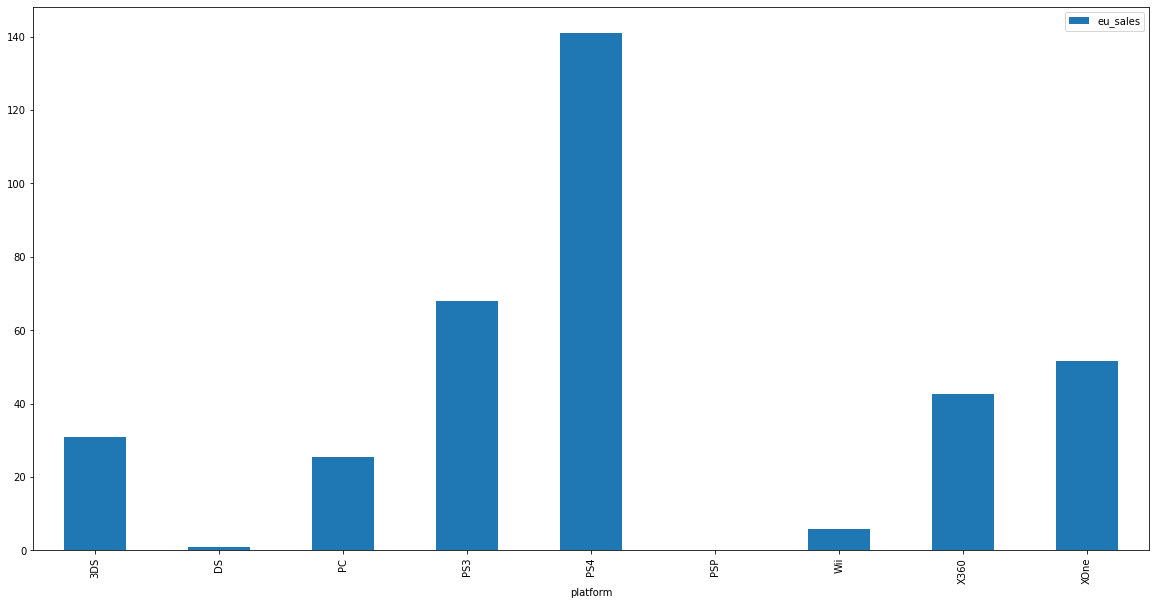

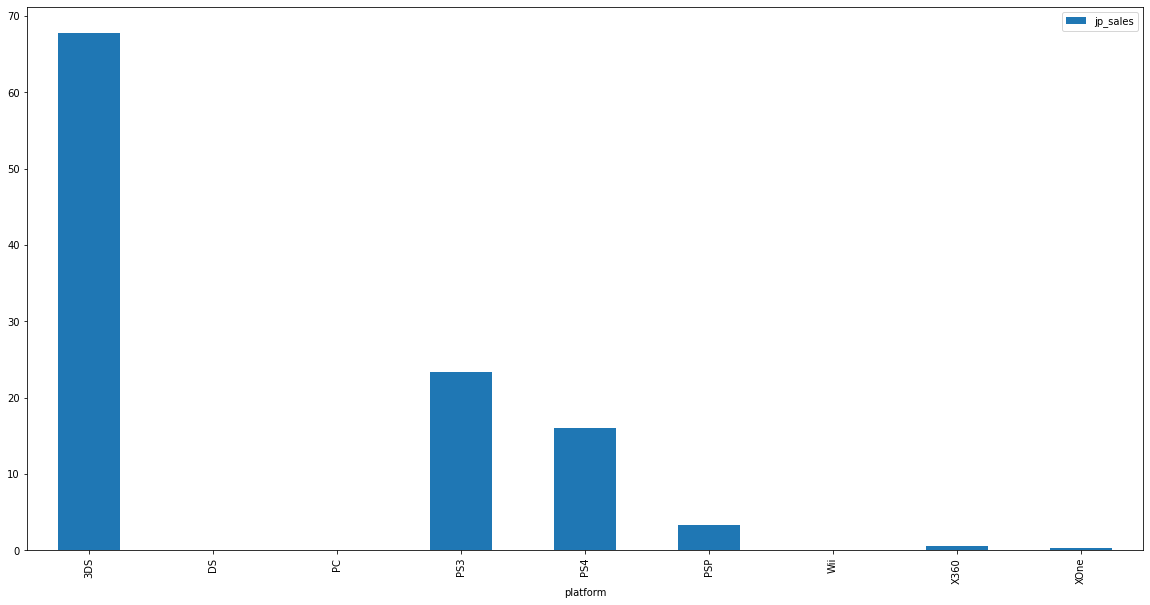

In [77]:
#fig = go.Figure()
countries =['na_sales', 'eu_sales', 'jp_sales']
for country in countries:
    data_country=data_actual.pivot_table(index='platform', values=country, aggfunc='sum').reset_index()
    #seaborn.barplot(data=data_country, x='platform', y=country)
    data_country['part'] = data_country[country]/data_country[country].sum()
    data_country.plot(kind='bar', x='platform', y =country)
    #fig.add_trace(go.Bar(x = data_country['platform'], y = data[country]))
    
    display(data_country)
#fig.show()

#Почему не работает plotly? Юпитер не показывает ошибку, но вместо графика просто белое пространство

  platform  na_sales  eu_sales  jp_sales
0      3DS     38.20     30.96     67.81
1       DS      0.57      0.85      0.00
2       PC     11.11     25.36      0.00
3      PS3     63.50     67.81     23.35
4      PS4    108.74    141.09     15.96
5      PSP      0.00      0.17      3.29
6      Wii      6.56      5.93      0.05
7     X360     81.66     42.52      0.51
8     XOne     93.12     51.59      0.34


<AxesSubplot: title={'center': 'Популярность платформ в странах'}, xlabel='platform'>

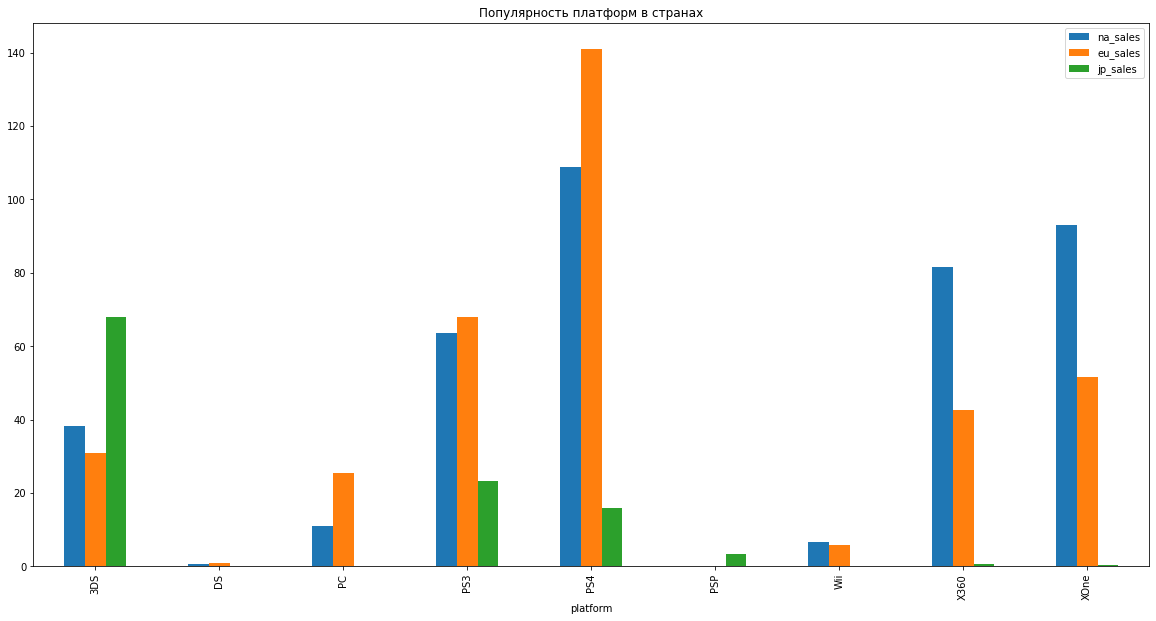

In [78]:
data_america=data_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').reset_index()
data_europe=data_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').reset_index()
data_japan=data_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').reset_index()
data_all_countries=data_america.merge(data_europe, on='platform').merge(data_japan, on='platform')  
print(data_all_countries)
data_all_countries.plot(kind='bar', x='platform', title='Популярность платформ в странах')


Пять популярных платформ в Северной Америке:

- PS4	27%
- XOne	23%
- X360	20%
- PS3	16%
- 3DS	9%	

Более менее равномерное распределение между тремя первыми платформами

Пять попуялрных платформ в Европе:

- PS4	39%
- PS3	19%
- XOne	14%
- X360	12%
- 3DS	8%

Первая плфторма имеет преимущество

Пять попуялрных платформ в Японии:

- 3DS	61%
- PS3	21%
- PS4	14%
- PSP	30%
- X360	1%

Лидирующая платформа занимает более 50 процентов рынка. И если в Америке и Европе лидировала PS4, то в Японии абсолютным лидером является 3DS, которая в дпугих странах занимает всего лишь пятое место. Рынок восточной страны очень отличается от Америки и Европы:)

##### Проанализируем популярность жанров в разных странах

In [79]:
countries =['na_sales', 'eu_sales', 'jp_sales']
for country in countries:
    data_country=data_actual.pivot_table(index='genre', values=country, aggfunc='sum').sort_values(by=country, ascending=False)
    data_country['part'] = data_country[country]/data_country[country].sum()
    print(data_country[country].sum())
    display(data_country)

403.4600000000001


,na_sales,part
genre,,
Action,117.68,0.291677
Shooter,107.14,0.265553
Sports,63.90,0.158380
Role-Playing,44.15,0.109428
Misc,24.31,0.060254
Fighting,12.10,0.029991
Platform,10.34,0.025628
Racing,9.68,0.023992
Adventure,6.48,0.016061


366.2800000000001


,eu_sales,part
genre,,
Action,110.93,0.302856
Shooter,85.79,0.234220
Sports,59.04,0.161188
Role-Playing,35.46,0.096811
Racing,17.91,0.048897
Misc,16.87,0.046058
Simulation,10.88,0.029704
Platform,10.40,0.028394
Adventure,7.59,0.020722


111.31000000000003


,jp_sales,part
genre,,
Role-Playing,43.53,0.391070
Action,33.66,0.302399
Fighting,6.00,0.053904
Misc,5.17,0.046447
Shooter,5.02,0.045099
Simulation,4.48,0.040248
Sports,4.18,0.037553
Adventure,3.88,0.034858
Platform,2.34,0.021022


,genre,na_sales,eu_sales,jp_sales
0,Action,117.68,110.93,33.66
1,Adventure,6.48,7.59,3.88
2,Fighting,12.10,6.97,6.00
3,Misc,24.31,16.87,5.17
4,Platform,10.34,10.40,2.34
5,Puzzle,0.21,0.61,0.91
6,Racing,9.68,17.91,0.93
7,Role-Playing,44.15,35.46,43.53
8,Shooter,107.14,85.79,5.02
9,Simulation,4.71,10.88,4.48


<AxesSubplot: title={'center': 'Популярность жанров в странах'}, xlabel='genre'>

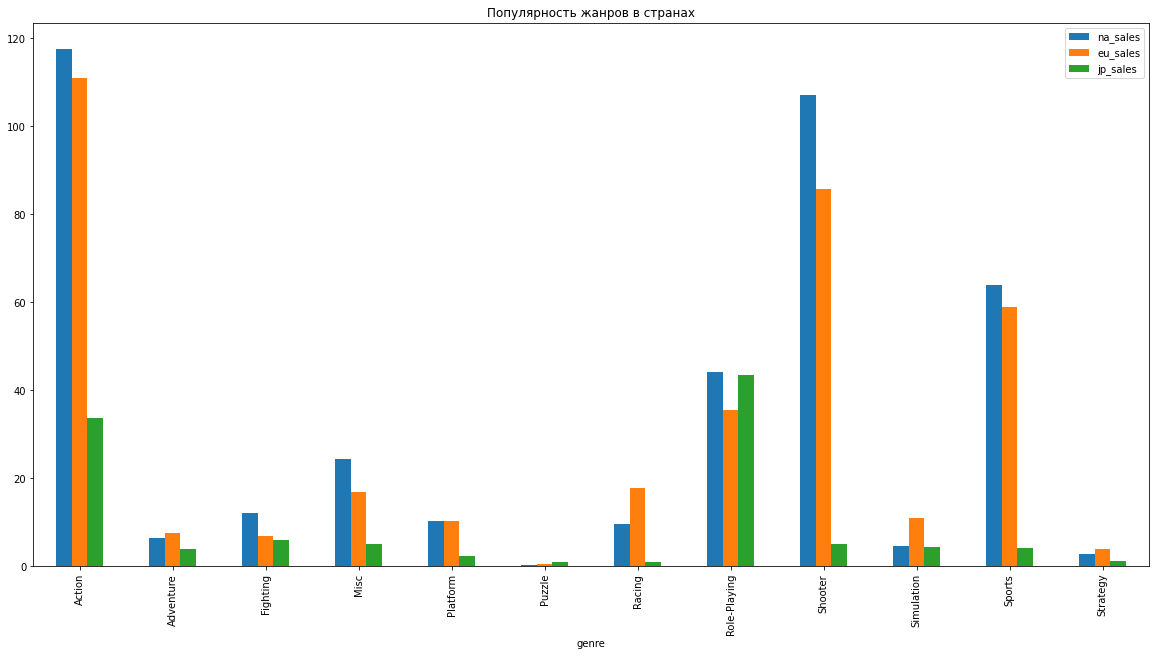

In [80]:
data_america=data_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').reset_index()
data_europe=data_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').reset_index()
data_japan=data_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').reset_index()
data_all_countries=data_america.merge(data_europe, on='genre').merge(data_japan, on='genre')  
display(data_all_countries)
data_all_countries.plot(kind='bar', x='genre', title='Популярность жанров в странах')


Пять популярных жанров в Северной Америке:

- Action	29%
- Shooter	27%
- Sports	16%
- Role-Playing	11%
- Misc	6%

Самые популярные жанры -- Action и Shooter

Пять популярных жанров в Европе:

- Action	30%
- Shooter	23%
- Sports	16%
- Role-Playing	10%
- Racing	5%

Самые популярные жанры -- Action и Shooter. Европа и Америка похожи в своих предпочтениях

Пять популярных жанров в Японии:

- Role-Playing	39%
- Action	30%
- Fighting	5%
- Misc	5%
- Shooter	5%

Самые популярные жанры -- Role-Playing и Action . Shooter опустился в рейтинге относительно Америки и Европы. Японцы очень спокойные и миролюбивые люди:)

##### Влияние рейтинга на продажи в разных странах

,rating,na_sales
0,E,66.30
1,E10+,45.44
2,M,162.77
3,T,46.28
4,unknown,82.67


,rating,eu_sales
0,E,74.07
1,E10+,35.08
2,M,143.43
3,T,39.33
4,unknown,74.37


,rating,jp_sales
0,E,9.70
1,E10+,3.32
2,M,12.45
3,T,15.06
4,unknown,70.78


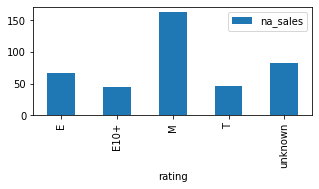

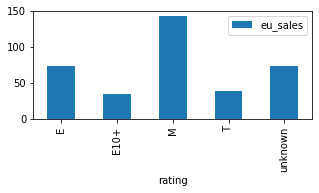

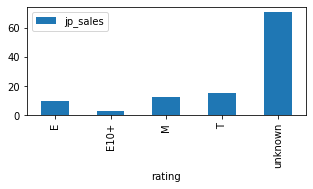

In [81]:

countries =['na_sales', 'eu_sales', 'jp_sales']
for country in countries:
    display(data_actual.pivot_table(index='rating', values=country, aggfunc='sum').reset_index())
    data_c = data_actual.pivot_table(index='rating', values=country, aggfunc='sum').reset_index()
    data_c.plot(kind='bar', x = 'rating', y=country,figsize=(5,2))
    

In [82]:
df_America = pd.DataFrame({
    'rating': ['E', 'M','T','E10+','unknown'],
    'America': [119.63, 107.14, 176.69, 45.44, 82.67]
})

df_Europe = pd.DataFrame({
    'rating': ['E', 'M','T','E10+','unknown'],
    'Europe': [123.3, 85.79, 157.19, 35.08, 74.37]
})

df_Japan = pd.DataFrame({
    'rating': ['E', 'M','T','E10+','unknown'],
    'Japan': [21.89, 5.02, 84.4, 3.32, 70.78]
})

df_America_Europe = df_America.merge(df_Europe, on='rating')
df_all = df_America_Europe.merge(df_Japan, on='rating')
df_all['sales_total_on rating'] = df_all[['America', 'Europe', 'Japan']].sum(axis=1)
display(df_all)

,rating,America,Europe,Japan,sales_total_on rating
0,E,119.63,123.30,21.89,264.82
1,M,107.14,85.79,5.02,197.95
2,T,176.69,157.19,84.40,418.28
3,E10+,45.44,35.08,3.32,83.84
4,unknown,82.67,74.37,70.78,227.82


In [240]:
data_a_eu_jp=data_actual.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
display(data_a_eu_jp)

,rating,eu_sales,jp_sales,na_sales
0,E,74.07,9.70,66.30
1,E10+,35.08,3.32,45.44
2,M,143.43,12.45,162.77
3,T,39.33,15.06,46.28
4,unknown,74.37,70.78,82.67


<AxesSubplot:title={'center':'Популярность рейтингов в разных странах'}, xlabel='rating'>

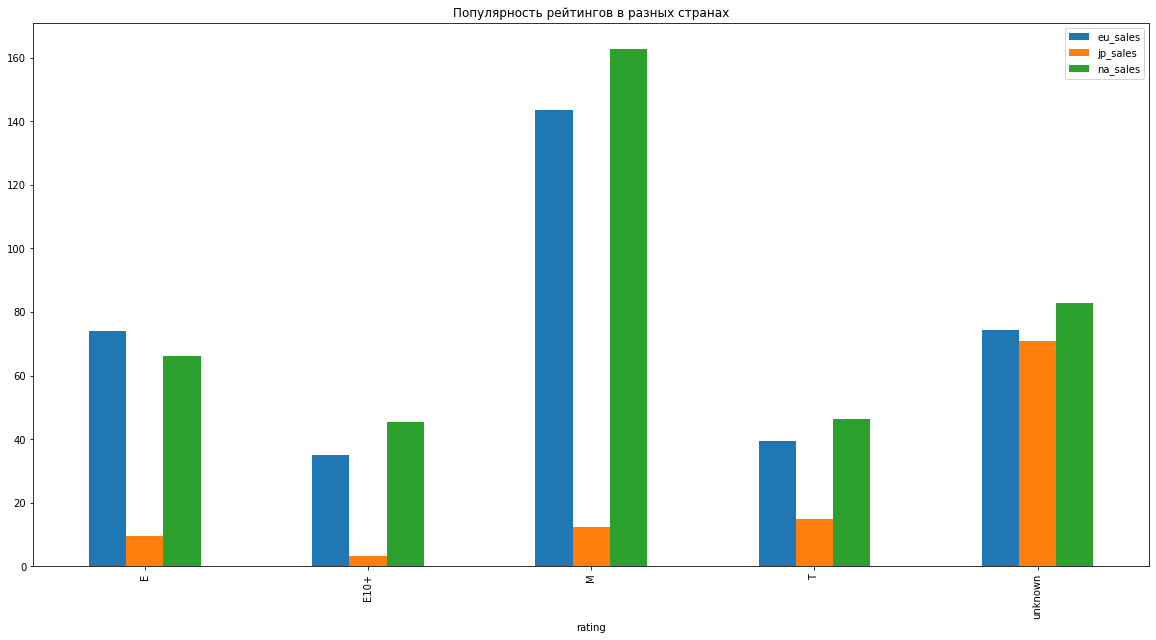

In [241]:
#countries=['America', 'Europe', 'Japan']
#seaborn.barplot(data=df_all, x='rating',y = 'sales_total_on rating', hue=)    
data_a_eu_jp.plot(kind='bar', x = 'rating', title='Популярность рейтингов в разных странах')    
    

Самая популярная категория в Америке и Европе -- это "M", но она совсем не так популярна в Японии. И это абсолютно логично и связано с тем, что в Японии не любят жанры игр, которые требуют пометки "для взрослых" (например, shooting). Для Японии в наших данных оказалось очень много строк с unknown,тк ESRB -- это американский рейтинг и востояная страна очень далека от этого рейтинга. Также стоит отметить, что распределние почти для всех категорий одинаково в Америке и Европе. 

### Проверка гипотез

#### Гипотеза №1

- Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- Алтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные

Альтернативная гипотеза должна отражать противоположный нулевой гипотезе исход событий

In [84]:
from scipy import stats as st
import numpy as np

sample_1 = data_actual[data_actual['platform'] == 'XOne']['user_score']
sample_2 = data_actual[data_actual['platform'] == 'PC']['user_score']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2, equal_var = False) #используем специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.04657158430650933
Отвергаем нулевую гипотезу


Вывод: нельзя утверждать, что  средние пользовательские рейтинги платформ Xbox One и PC одинаковые

#### Гипотеза №2

- Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковы.

- Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

In [85]:
sample_1 = data_actual[data_actual['genre'] == 'Action']['user_score']
sample_2 = data_actual[data_actual['genre'] == 'Sports']['user_score']

alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.8710474211212493e-20
Отвергаем нулевую гипотезу


Вывод: нет поводов утвержать, что средние пользовательские рейтинги жанров Action и Sports одинаковы

### Вывод

- В ходе работы была проведена подготовка данных к исследованию, заполнены пропуски, данные были приведены к соответствующему для них типу

- Затем был проделан исследовательский анализ.

  - Были проанализированы года и выпущенные в это время игры. Игры начали активно выпускаться только в 2000-х годах, поэтому обрежем данные с годом выауска до 2000-х, тк они не существенны. 
  - Далее были проанализированы суммарные продажи по разным платформам. Высянилось PS4, X360 -- самые популярные. Если посмотреть распредление продаж по годам, платформам, то можно опредлеить, что в среднем платформа держит свою популярность примерно 5 лет. 
  - Можно заметить, что у платформ продажи падают. Нет ни одной, у которой наблюдается рост. Это свидетельсвтует о том, что скорее всего в 2017 появятся новые платформы, которые будут возглавлять топы в течение 5 лет
  - Затем было выявлено, как влияют на продажи внутри платформы отзывы пользователей и критиков. Для каких-то платформ корелляцию не удалось выявить совсем, для большинства платформ корелляция между оценкой критиков/пользователей и продажами игры не очень сильная. Ярче всего зависимость выражена у платформ PS4, XOne.
  - Что касается распредления по жанрам, то можно сделать вывод, что среди игр больше всего Action, Role-playing и Sports. Самыми прибыльными жанрами являются shooter, sports, role-playing. Shooter сильно лидирует, имеет большой отрыв по продажам от других жанров
  - Рассмотрев глубоко данные внутри каждой страны и сравнив их, был сделан вывод, что в Америке и Европе популярность среди платформ и жанров распределена примерно одинаково. Американды и европецы похожи в своих предпочтениях, однако японцы оказались совсем не похожими на сотальных. Судя по популярным в Японии жанрам, они очень миролюбивые люди.
  - Также была рассмотрена корелляция между рейтингом игры и обьемом ее продаж в разных странах. Выяснилось, что самое большое распространение имеют игры для подростков. Меньше всего проадются игры для взрослых, потому что их могут купить только люди, достигшие 18 лет. 
  
- Затем были выдвинуты гипотезы:
  - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
  - средние пользовательские рейтинги жанров Action и Sports одинаковы.
 - Обе гипотезы не были подтверждены. 
